In [59]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.offline as pyo
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Final_csv.csv')

In [13]:
df

rating         country        date  \
0         1.0          Jordan  04-08-2024   
1         1.0     Switzerland  04-08-2024   
2         6.0         Germany  04-05-2024   
3         3.0           Italy  04-01-2024   
4         1.0           Spain  03-28-2024   
...       ...             ...         ...   
13139     9.0     Switzerland  08-05-2013   
13140     2.0  United Kingdom  08-05-2013   
13141     8.0          Greece  08-04-2013   
13142     2.0       Australia  08-01-2013   
13143     5.0     New Zealand  07-30-2013   

                                                  review Type Of Traveller  \
0       Ryanair lost my luggage on a direct flight. I...          Business   
1        Booked Basel to Dublin 11.10 6.4.24. Baggage...    Family Leisure   
2         You get what you pay. Had overweight luggag...    Couple Leisure   
3        Very cheeky check-in system: this did not ha...    Couple Leisure   
4        Terrible customer service. Handling in Marra...    Family Leisure   
...                                                  ...               ...   
13139  Flew AUH-GVA A333. The Business class product ...      Solo Leisure   
13140  March 2013 MAN-AUH-DEL in Economy Class. While...      Solo Leisure   
13141  For some reason First Class is not always avai...      Solo Leisure   
13142  Very disappointing flight (DUB-AUH-SYD) recent...      Solo Leisure   
13143  Myself my Partner and 8 year old son have just...      Solo Leisure   

            Seat Type   Date Flown  Seat Comfort  Cabin Staff Service  \
0       Economy Class   April 2024           2.0                  1.0   
1       Economy Class   April 2024           1.0                  1.0   
2       Economy Class   April 2024           3.0                  3.0   
3       Economy Class   March 2024           1.0                  2.0   
4       Economy Class   March 2024           2.0                  4.0   
...               ...          ...           ...                  ...   
13139  Business Class  August 2013           5.0                  4.0   
13140   Economy Class  August 2013           2.0                  2.0   
13141     First Class  August 2013           5.0                  5.0   
13142   Economy Class  August 2013           3.0                  1.0   
13143   Economy Class    July 2013           2.0                  4.0   

       Food & Beverages  ...                      author  CODE2  CODE3  \
0                   2.0  ...               Alan Robinson     JO    JOR   
1                   2.0  ...                    T Maysan     CH    CHE   
2                   3.0  ...  55 reviews\n\n\n\nR Darnel     DE    DEU   
3                   2.0  ...                      Y Chen     IT    ITA   
4                   2.0  ...                 Diego Perez     ES    ESP   
...                 ...  ...                         ...    ...    ...   
13139               4.0  ...              David Monteiro     CH    CHE   
13140               3.0  ...                    V Saxena     GB    GBR   
13141               5.0  ...               S Nkavoyannis     GR    GRC   
13142               2.0  ...                 Colin Walsh     AU    AUS   
13143               4.0  ...                   Nick Thow     NZ    NZL   

        Latitude   Longitude Verified review_length roberta_polarity  \
0      31.166705   36.941628        1           188        -0.716298   
1      46.798562    8.231974        1           441        -0.551128   
2      51.163818   10.447831        1            94        -0.353992   
3      42.638426   12.674297        0           108        -0.721132   
4      39.326068   -4.837979        0           594        -0.652707   
...          ...         ...      ...           ...              ...   
13139  46.798562    8.231974        0            54         0.691070   
13140  54.702354   -3.276575        0           189        -0.318521   
13141  38.995368   21.987713        0           137        -0.551128   
13142 -24.776109  134.755000        0      

# Time series plots

## Average ratings for each airlines over time

In [6]:
import pandas as pd
import plotly.express as px

# Convert to pd.datetime format
df['Date Flown tmp'] = pd.to_datetime(df['Date Flown'], format='%B %Y')

# Calculate the monthly average ratings for each airline
airline_ratings = df.groupby([pd.Grouper(key='Date Flown tmp', freq='M'), 'Airlines'])['rating'].mean().reset_index()

# Plot the monthly average ratings and trend lines for each airline using Plotly Express
for airline in df['Airlines'].unique():
    airline_data = airline_ratings[airline_ratings['Airlines'] == airline]
    fig = px.scatter(airline_data, x='Date Flown tmp', y='rating', 
                     trendline='lowess', title=f'Average Rating for {airline} over time',
                     custom_data=['Date Flown tmp'], 
                    labels={'Date Flown tmp': 'Date Flown', 'Average Rating': 'Average Rating'})  # Add custom data for hover labels
    fig.update_traces(line=dict(color='red'))  # Set trend line color to red
    fig.update_yaxes(title_text='Average Rating')  # Set y-axis label
    fig.update_layout(xaxis_title='Date Flown', yaxis_title='Average Rating', hovermode='x unified')  # Enable unified hover mode
    fig.update_traces(hovertemplate='<b>Average Rating:</b> %{y}')  # Customize hover label template for scatter points
    fig.update_xaxes(nticks=12)
    fig.show()


## Average ratings of all airlines over time

In [7]:
# Calculate the monthly average ratings 
ratings = df.groupby([pd.Grouper(key='Date Flown tmp', freq='M')])['rating'].mean().reset_index()


fig = px.scatter(ratings, x='Date Flown tmp', y='rating', 
                 trendline='lowess', title=f'Average Rating over time',
                 custom_data=['Date Flown tmp'], 
                labels={'Date Flown tmp': 'Date Flown', 'Average Rating': 'Average Rating'})  # Add custom data for hover labels

fig.update_traces(line=dict(color='red'), hovertemplate='<b>Average Rating:</b> %{y}')  # Set trend line color to red


fig.update_layout(
    xaxis_title='Date Flown', 
    yaxis_title='Average Rating', 
    hovermode='x unified',
    xaxis=dict(nticks=20)
)

## Number of reviewers over time stratified by airlines

In [15]:
# Group by 'Date Flown tmp' (monthly) and 'Airlines' and count the number of flights
monthly_flights = df.groupby([pd.Grouper(key='Date Flown tmp', freq='M'), 'Airlines']).size().reset_index(name='Number of Customers')

# Plot the line plot using Plotly Express
fig = px.line(monthly_flights, x='Date Flown tmp', y='Number of Customers', color='Airlines', 
              title='Number of reviewers for each airline over time',
              labels={'Number of Customers': 'Number of reviewers', 'Date Flown tmp': 'Date'})
fig.update_layout(xaxis_title='Date Flown', yaxis_title='Number of Reviewers', hovermode='x', xaxis=dict(nticks=20))
fig.show()

## Number of reviewers over time

In [16]:
# Group by 'Date Flown tmp' (monthly) and 'Airlines' and count the number of flights
monthly_flights = df.groupby([pd.Grouper(key='Date Flown tmp', freq='M')]).size().reset_index(name='Number of Customers')

# Plot the line plot using Plotly Express
fig = px.line(monthly_flights, x='Date Flown tmp', y='Number of Customers', 
              title='Number of reviewers over time',
              labels={'Number of Customers': 'No. of reviewers', 'Date Flown tmp': 'Date'})
fig.update_layout(xaxis_title='Date Flown', yaxis_title='No. of reviewers', hovermode='x', xaxis=dict(nticks=20))
fig.show()

## Number of reviewers over time stratified by sentiments

In [17]:
# Group by 'Date Flown tmp' (monthly) and 'Airlines' and count the number of flights
monthly_sentiments = df.groupby([pd.Grouper(key='Date Flown tmp', freq='M'), 'roberta_sentiment']).size().reset_index(name='Number of Customers')

# Filter by specifying time range
monthly_sentiments = monthly_sentiments[(monthly_sentiments['Date Flown tmp'] >= '2020-01-01') & (monthly_sentiments['Date Flown tmp'] < '2024-01-01')]

# plot the number of reviewers stratified by sentiments
fig = px.line(monthly_sentiments, x='Date Flown tmp', y='Number of Customers', color='roberta_sentiment',
                 title=f'Number of reviewers over time stratified by sentiments', 
                labels={'Date Flown tmp': 'Month', 'Number of Customers': 'No. of reviewers'})

fig.update_layout(xaxis_title='Date Flown', yaxis_title='No. of reviewers', hovermode='x')  # Enable unified hover mode
fig.show()

# Box plots

In [54]:
# Box plots 
def plot_grouped_box(df,feat_x,feat_y):
    """
    Plot the distribution of feat_x for different values of feat_y.
    """
    sns.set(style="whitegrid")
    ax = sns.catplot(data=df, x=feat_x, y=feat_y, kind='box', palette='Set2', height=4, aspect=1.25)
    ax.set(xlabel=feat_x, ylabel=feat_y)
    return

## Ratings vs Recommended

In [55]:
feat_x = 'Recommended'
feat_y = 'rating'
plot_grouped_box(df,feat_x,feat_y)

## Type of Traveller vs Ratings

In [56]:
feat_x = 'rating'
feat_y = 'Type Of Traveller'
plot_grouped_box(df,feat_x,feat_y)

## Seat Type vs Ratings

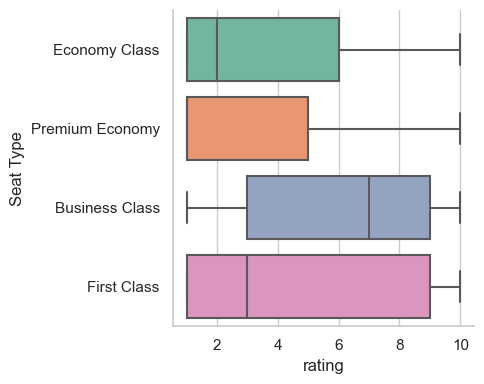

In [57]:
feat_x = 'rating'
feat_y = 'Seat Type'
plot_grouped_box(df,feat_x,feat_y)

# Bar plots

## Average Review length vs Sentiment

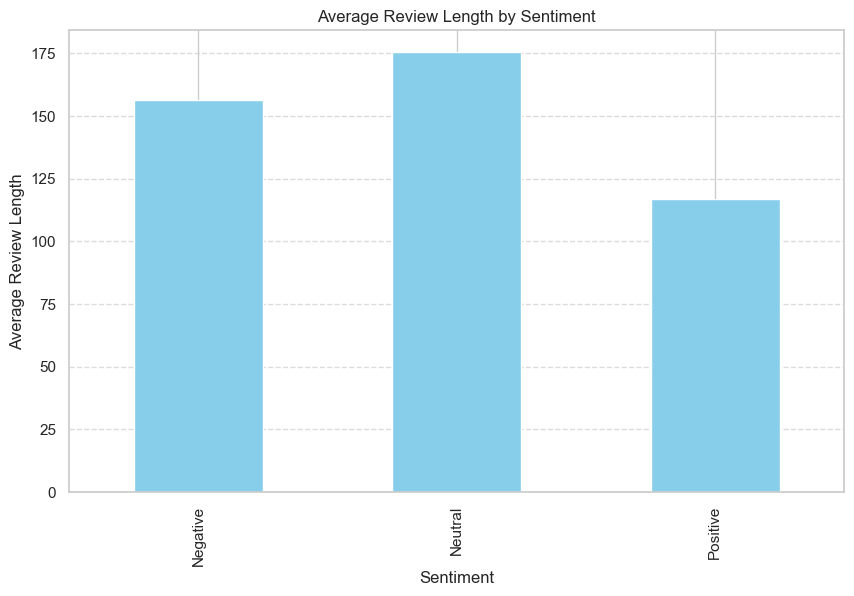

In [26]:
# Group by rating and calculate average review length
avg_review_length = df.groupby('roberta_sentiment')['review_length'].mean()

# Plotting
plt.figure(figsize=(10, 6))
avg_review_length.plot(kind='bar', color='skyblue')
plt.title('Average Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Review Length')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Seat Type distribution of reviewers for each airlines

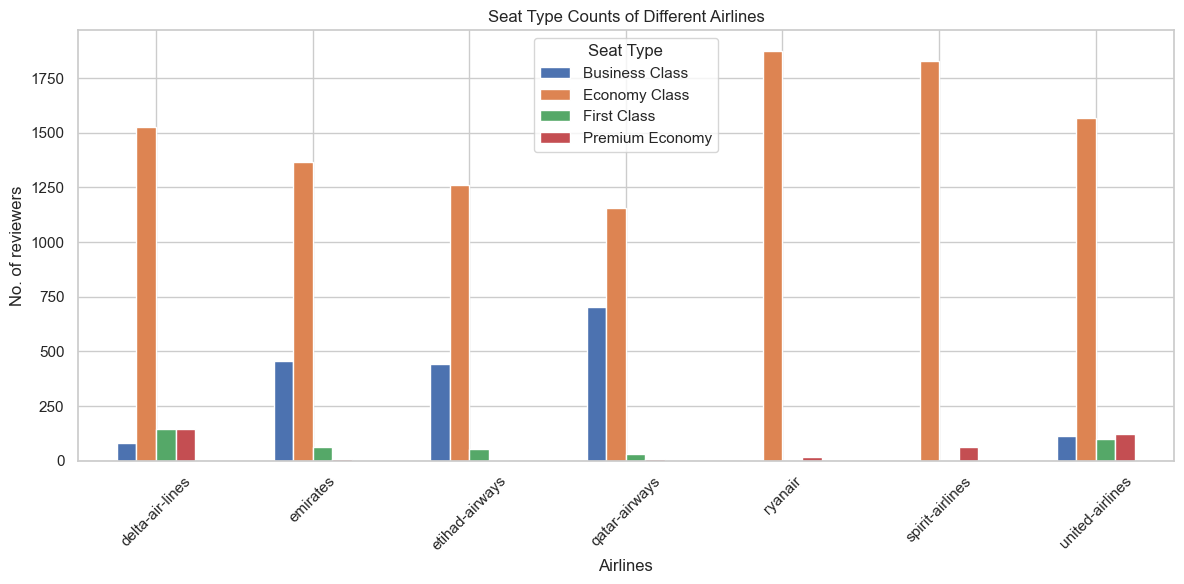

In [27]:
df_filtered = df[['Airlines', 'Seat Type']]

# Group by Airlines and Seat Type and count occurrences
seat_type_counts = df_filtered.groupby(['Airlines', 'Seat Type']).size().unstack(fill_value=0)

seat_type_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Seat Type Counts of Different Airlines')
plt.xlabel('Airlines')
plt.ylabel('No. of reviewers')
plt.xticks(rotation=45)
plt.legend(title='Seat Type')
plt.tight_layout()
plt.show()

## Number of reviewers who recommended for each airline

In [28]:
# Group by airlines and sum the 'recommended' column to get the count of recommended customers for each airline
recommended_customers = df.groupby('Airlines')['Recommended'].sum().reset_index()

# Create the plotly bar chart
fig = px.bar(recommended_customers, x='Airlines', y='Recommended', color='Airlines',
             title='Number of reviewers who recommended for each airline',
             labels={'Airlines': 'Airlines', 'Recommended': 'No. of reviewers'},
             color_discrete_sequence=['green'])

# Rotate x-axis labels for better readability
fig.update_layout(xaxis=dict(tickangle=45), showlegend=False, width=700, height=550)

# Show the plot
fig.show()

## Proportion of Sentiment Categories for Each Airline

In [33]:
# Group by Airline and Sentiment, count occurrences, and unstack the result
grouped = df.groupby(['Airlines', 'roberta_sentiment']).size().unstack(fill_value=0)

# Normalize the counts to get proportions
grouped = grouped.div(grouped.sum(axis=1), axis=0)


# Define colors for each sentiment
colors = {'Negative': 'midnightblue', 'Neutral': 'darkcyan', 'Positive': 'orange'}

# Create traces for each sentiment category
traces = []
for sentiment, color in colors.items():
    trace = go.Bar(
        x=grouped.index,
        y=grouped[sentiment],
        name=sentiment,
        marker=dict(color=color)
    )
    traces.append(trace)

# Create the layout
layout = go.Layout(
    title='Proportion of Sentiment Categories for Each Airline',
    xaxis=dict(title='Airline'),
    yaxis=dict(title='Proportion'),
    barmode='stack'
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the figure
fig.show()


## Proportion of reviewers for each rating score

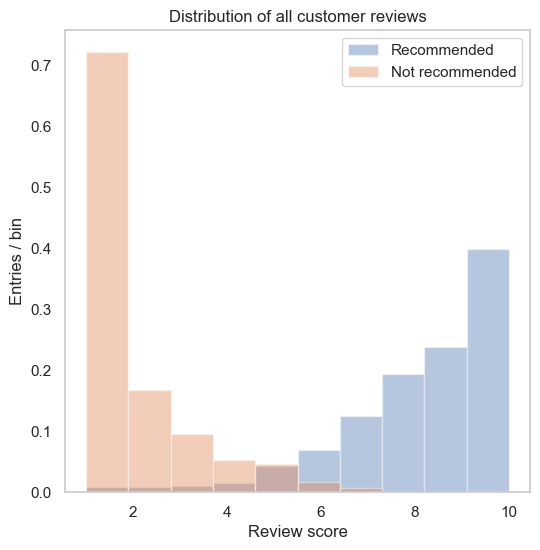

In [58]:
def plot_two_hists_comp_sns(df_1,df_2,label_1,label_2,feat,bins,title,x_label,y_label):
    """
    Plot two histograms of a given feature in two different datasets.
    """
    plt.figure(figsize=(6,6))
    sns.distplot(df_1[feat],hist=True,norm_hist=True,kde=False,label=label_1,bins=bins)
    sns.distplot(df_2[feat],hist=True,norm_hist=True,kde=False,label=label_2,bins=bins)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(False)
    plt.legend(loc='best')
    plt.show()
    return

df_recommended = df[df['Recommended']==1].copy()
df_not_recommended = df[df['Recommended']==0].copy()



plot_two_hists_comp_sns(df_1=df_recommended,
                        df_2=df_not_recommended,
                        label_1='Recommended',
                        label_2='Not recommended',
                        feat='rating',
                        bins=10,
                        title='Distribution of all customer reviews',
                        x_label='Review score',
                        y_label='Entries / bin'
                        )



# Word clouds for Positive and Negative sentiment category

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
import nltk

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function for text preprocessing
def preprocess_text(text):
    
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Perform Part-of-Speech tagging
    pos_tags = pos_tag(words)
    
    # Keep only verbs and adjectives
    filtered_words = [word for word, pos in pos_tags if pos.startswith('V') or pos.startswith('J')]
    
    # Lemmatize words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    
    # Remove stopwords
    cleaned_text = ' '.join([word for word in filtered_words if word not in stop_words])
    
    return cleaned_text

# Function to generate word clouds
def generate_word_cloud(sentiment_label, text_data, colormap):
    # Generate word frequencies
    word_freq = Counter(text_data.split())
    # Generate word cloud
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10, 
                colormap=colormap).generate_from_frequencies(word_freq)
    # Plot word cloud
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(f'Word Cloud for {sentiment_label} Reviews')
    plt.savefig(f'{sentiment_label}_word_cloud.png')
    plt.show()

# Extracting Positive, Negative, Neutral reviews
positive_reviews = df[df['roberta_sentiment'] == 'Positive']
negative_reviews = df[df['roberta_sentiment'] == 'Negative']
neutral_reviews = df[df['roberta_sentiment'] == 'Neutral']



## Word cloud for Positive Reviews

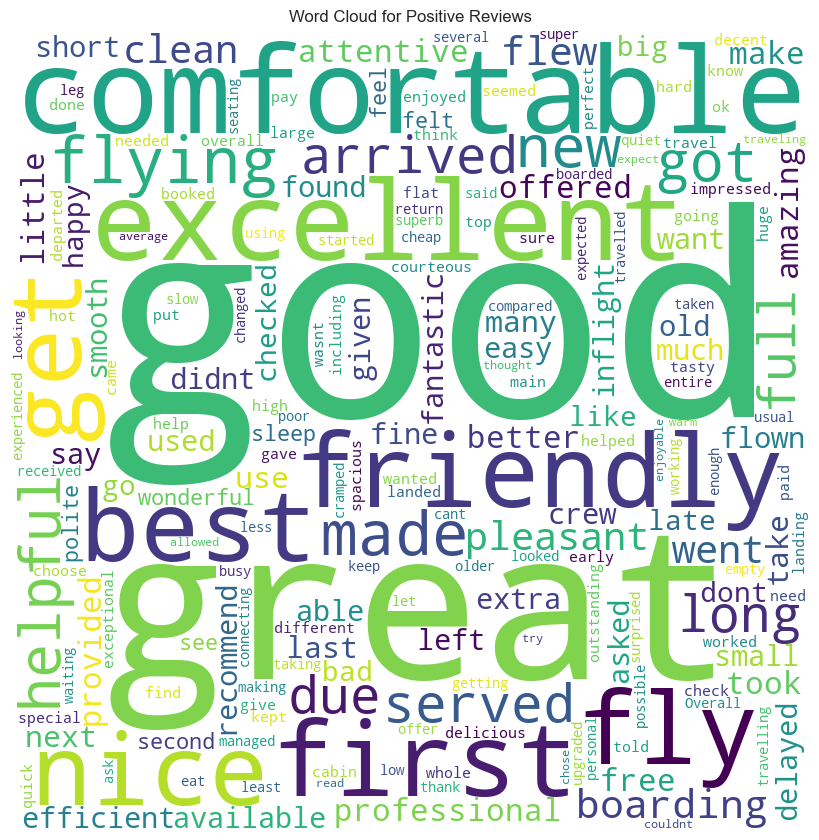

In [46]:
generate_word_cloud('Positive', ' '.join(positive_reviews['review'].apply(preprocess_text)), colormap='viridis')

## Word cloud for negative reviews

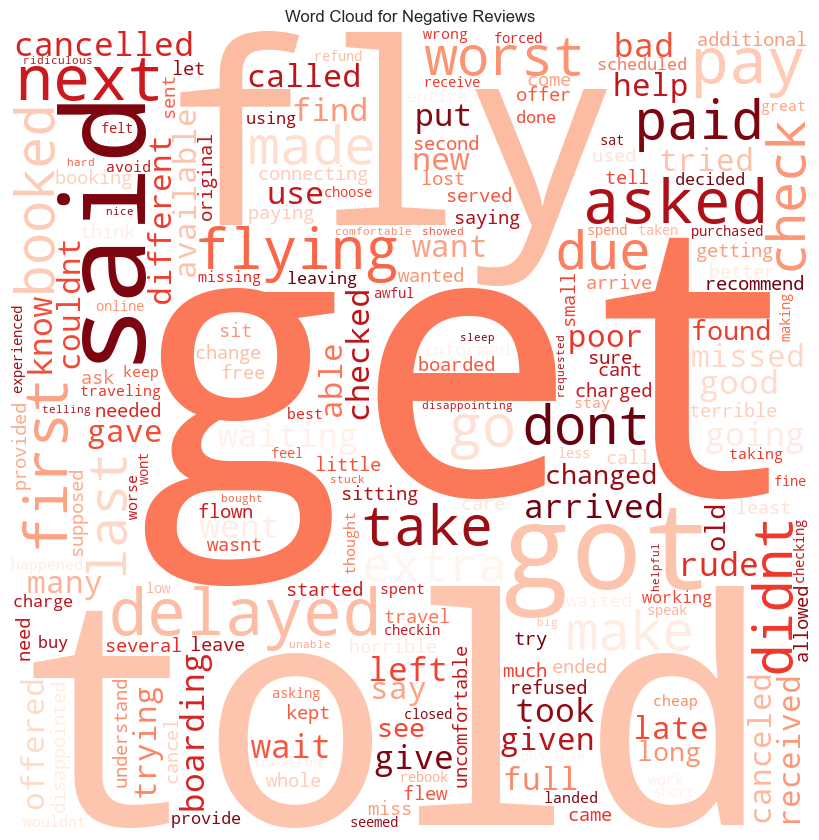

In [47]:
generate_word_cloud('Negative', ' '.join(negative_reviews['review'].apply(preprocess_text)), colormap='Reds')

# Correlation heatmap for different aspects of ratings

In [48]:
import plotly.graph_objects as go
import numpy as np

# Calculate correlation matrix
correlation_matrix = df[['rating', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment']].corr()

# Create figure
fig = go.Figure(data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.index,
        y=correlation_matrix.columns,
        colorscale='Viridis'))

# Add annotations
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        fig.add_annotation(x=correlation_matrix.index[j], y=correlation_matrix.columns[i],
                           text=str(round(correlation_matrix.iloc[i, j], 2)),
                           showarrow=False, font=dict(color='white', size=12))

# Update layout
fig.update_layout(
    title='Correlation Heatmap',
    xaxis=dict(title='Rating Categories'),
    yaxis=dict(title='Rating Categories'))

# Show plot
fig.show()


# Line plot for average ratings

In [49]:
import plotly.express as px

# Calculate the average ratings and standard errors for each combination of "Seat Type" and "Type Of Traveller"
avg_ratings = df.groupby(["Seat Type", "Type Of Traveller"])["rating"].agg(['mean', 'sem']).reset_index()
avg_ratings.columns = ['Seat Type', 'Type Of Traveller', 'Average Rating', 'Standard Error']

# Create the interactive interaction plot with error bounds
fig = px.line(avg_ratings, x='Seat Type', y='Average Rating', color='Type Of Traveller', 
              error_y='Standard Error', labels={'Seat Type': 'Seat Type', 'Average Rating': 'Average Rating', 'Type Of Traveller': 'Type Of Traveller'},
              title='Average rating stratified by Seat Type and Type of Traveller',
              width=800, height=600)

fig.show()

# Summary statistics

In [ ]:
# Statistics of ratings
df['rating'].describe()

**Overview of Conclusions:**

1. **Skewed Distribution**: The distribution of ratings appears to be heavily skewed towards lower ratings, as indicated by the relatively low mean compared to the median and the high standard deviation. This suggests that a significant proportion of reviewers may have had negative experiences or provided lower ratings.

2. **Variability in Ratings**: The high standard deviation indicate that there is considerable variability in the opinions of reviewers. This variability could stem from differences in individual experiences, expectations, and preferences.

3. **Positive Skewness**: The data shows positive skewness, with more ratings concentrated towards the lower end of the scale and a longer tail towards higher ratings. This suggests that while there are some highly positive ratings, the majority of ratings tend to be lower.

4. **Potential Issues**: The presence of a large number of low ratings, as indicated by the 25th percentile being 1, may signal potential issues or areas for improvement in the flight experiences provided by the airlines.

In [ ]:
# Percentage of recommended flights
percentage_recommended = (df['Recommended'].sum() / len(df)) * 100
print("Percentage of Recommended Flights:", percentage_recommended)

**Overview of Conclusions:**

1. **Recommendation Rate**: A recommendation rate of around 32% suggests a lower level of satisfaction among the customers. 

2. **Room for Improvement**: The percentage of recommended flights falling below 50% suggests that there may be areas where airlines can enhance their services or address issues to increase customer satisfaction and the likelihood of recommendations.

In [ ]:
# Statistics of review length
df['review_length'].describe()

**Overview of Conclusions**:

1. **Varied Review Lengths**: The summary statistics show a wide range of review lengths, measured in terms of word count, ranging from 15 to 957 words. This indicates that reviewers have provided feedback across a spectrum of levels of detail.

2. **Average Review Length**: The average review length, measured in terms of word count, of approximately 147.50 words suggests that, on average, reviewers tend to provide relatively concise feedback. 

3. **Distribution of Review Lengths**: The quartiles (25th, 50th, and 75th percentiles) indicate that the majority of reviews are relatively short, with 75% of reviews having a word count of 186 words or fewer.